# Loading data

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')

In [6]:
def head_dataframe_by_chunk(df, size_chunk_columns=6, n_rows=2):
    from IPython.core.display import display, HTML

    if type(size_chunk_columns) is list:
        current_column = 0
        for i in size_chunk_columns:
            display(HTML('<style> .df thead tr { background-color: #B0B0B0; } </style>' +
                         df.iloc[:,current_column:current_column+i].head(n_rows).to_html(classes='df')))
            current_column += i
    elif type(size_chunk_columns) is int:
        for i in range(0, df.shape[1], size_chunk_columns):
            display(HTML('<style> .df thead tr { background-color: #B0B0B0; } </style>' +
                         df.iloc[:,i:i+size_chunk_columns].head(n_rows).to_html(classes='df')))

In [7]:
head_dataframe_by_chunk(data)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city
0,2014-08-11 07:46:59,2,3,66,348,48862
1,2014-08-11 08:22:12,2,3,66,348,48862


,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci
0,2234.2641,12,0,1,9,2014-08-27
1,2234.2641,12,0,1,9,2014-08-29


,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id
0,2014-08-31,2,0,1,8250,1
1,2014-09-02,2,0,1,8250,1


,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,0,3,2,50,628,1
1,1,1,2,50,628,1


In [9]:
head_dataframe_by_chunk(data.describe(), n_rows=8)

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance
count,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,2.414529e+07
mean,9.795271e+00,2.680473e+00,8.610880e+01,3.084060e+02,2.775304e+04,1.970090e+03
std,1.196754e+01,7.480393e-01,5.924310e+01,2.084437e+02,1.678255e+04,2.232442e+03
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e-03
25%,2.000000e+00,3.000000e+00,6.600000e+01,1.740000e+02,1.300900e+04,3.131670e+02
50%,2.000000e+00,3.000000e+00,6.600000e+01,3.140000e+02,2.765500e+04,1.140491e+03
75%,1.400000e+01,3.000000e+00,7.000000e+01,3.850000e+02,4.241300e+04,2.552599e+03
max,5.300000e+01,4.000000e+00,2.390000e+02,1.027000e+03,5.650800e+04,1.240790e+04


,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt
count,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07
mean,6.044518e+05,1.349265e-01,2.489042e-01,5.870761e+00,2.024296e+00,3.321222e-01
std,3.506175e+05,3.416451e-01,4.323782e-01,3.717095e+00,9.116678e-01,7.314981e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.989100e+05,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
50%,6.039140e+05,0.000000e+00,0.000000e+00,9.000000e+00,2.000000e+00,0.000000e+00
75%,9.101680e+05,0.000000e+00,0.000000e+00,9.000000e+00,2.000000e+00,0.000000e+00
max,1.198785e+06,1.000000e+00,1.000000e+00,1.000000e+01,9.000000e+00,9.000000e+00


,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent
count,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07
mean,1.112663e+00,1.444109e+04,2.582280e+00,7.965675e-02,1.483384e+00,3.156305e+00
std,4.591155e-01,1.106630e+04,2.153019e+00,2.707611e-01,1.219776e+00,1.623189e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,8.267000e+03,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
50%,1.000000e+00,9.147000e+03,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
75%,1.000000e+00,1.879000e+04,5.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00
max,8.000000e+00,6.510700e+04,9.000000e+00,1.000000e+00,2.690000e+02,6.000000e+00


,hotel_country,hotel_market,hotel_cluster
count,3.767029e+07,3.767029e+07,3.767029e+07
mean,8.129685e+01,6.004619e+02,4.980861e+01
std,5.617119e+01,5.117391e+02,2.891595e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+01,1.600000e+02,2.500000e+01
50%,5.000000e+01,5.930000e+02,4.900000e+01
75%,1.060000e+02,7.010000e+02,7.300000e+01
max,2.120000e+02,2.117000e+03,9.900000e+01


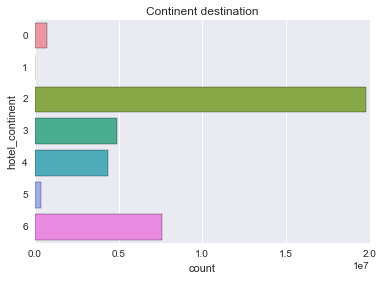

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(y='hotel_continent', data=data)
sns.plt.title('Continent destination')
plt.show()

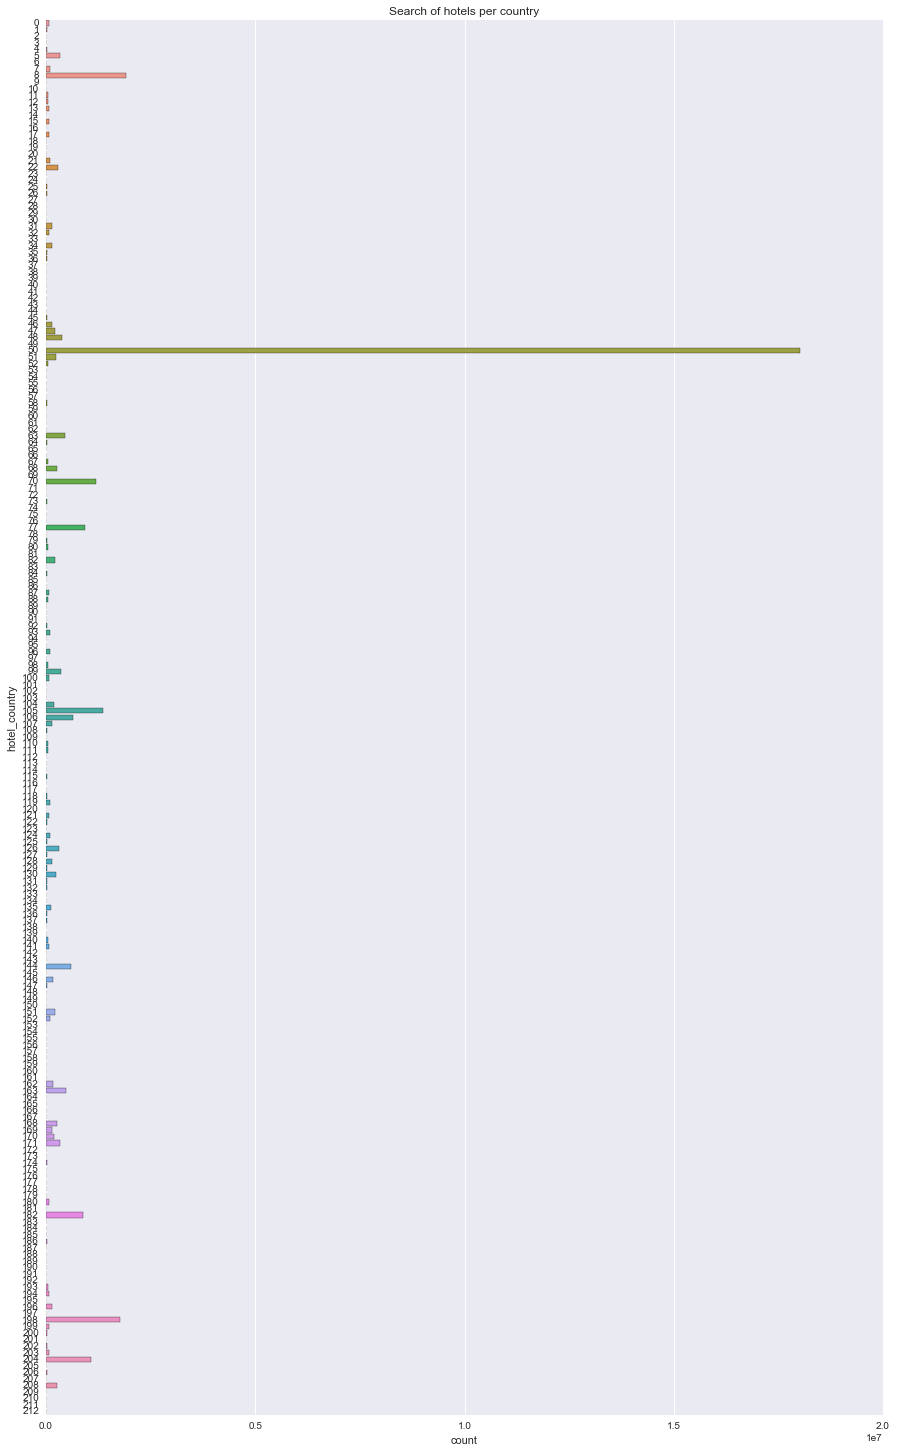

In [14]:
f, ax = plt.subplots(figsize=(15, 25))
sns.countplot(y='hotel_country', data=data)
plt.title('Search of hotels per country')
plt.show()

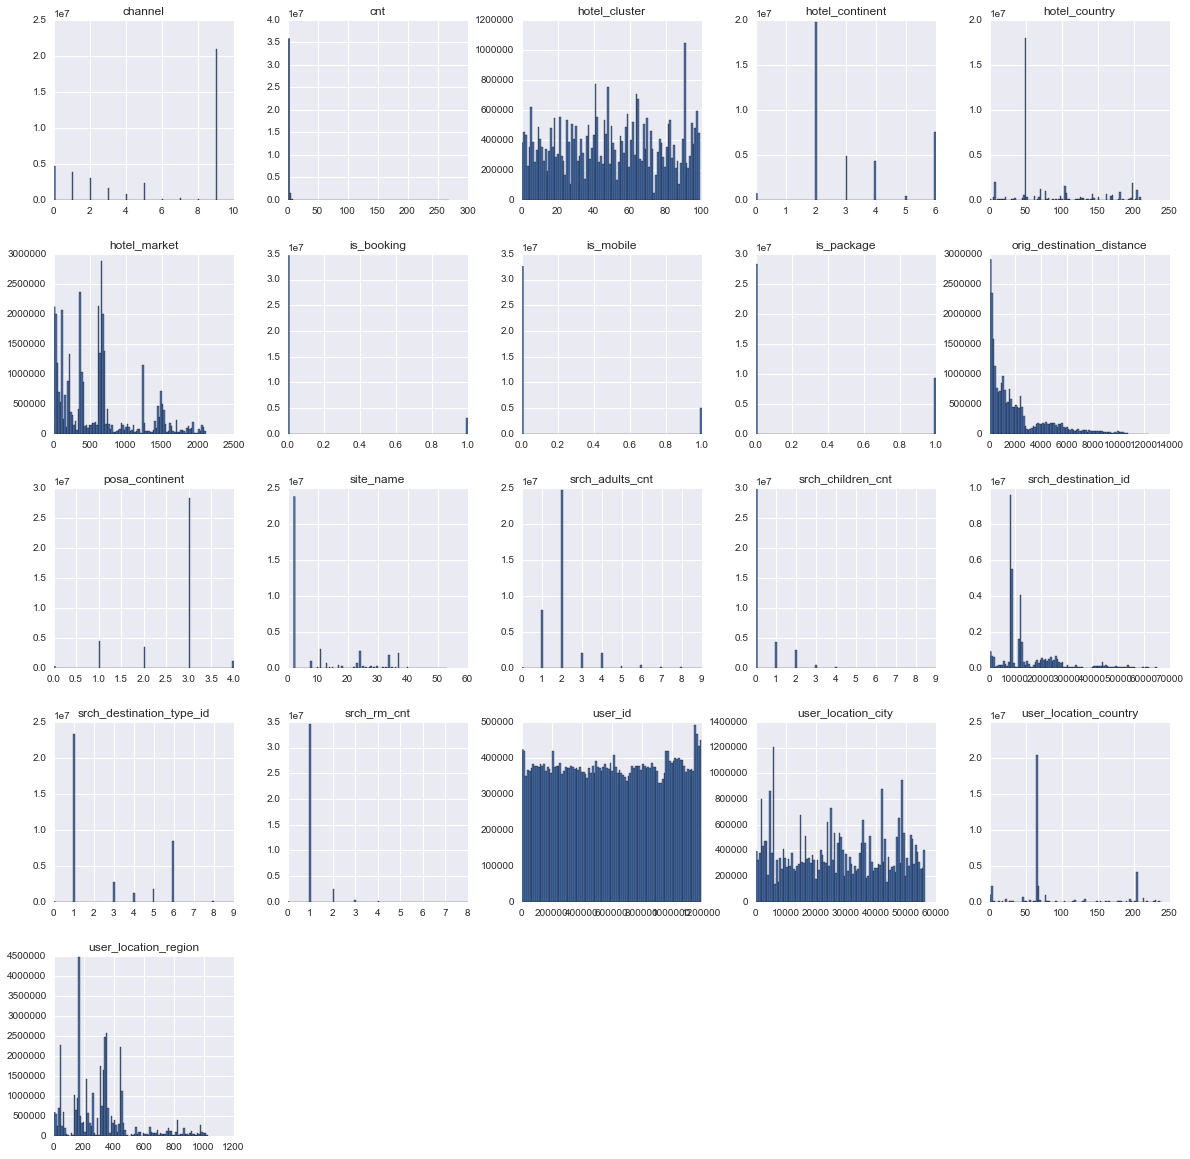

In [23]:
pd.DataFrame.hist(data, data.columns, bins = 100, figsize=(20, 20));

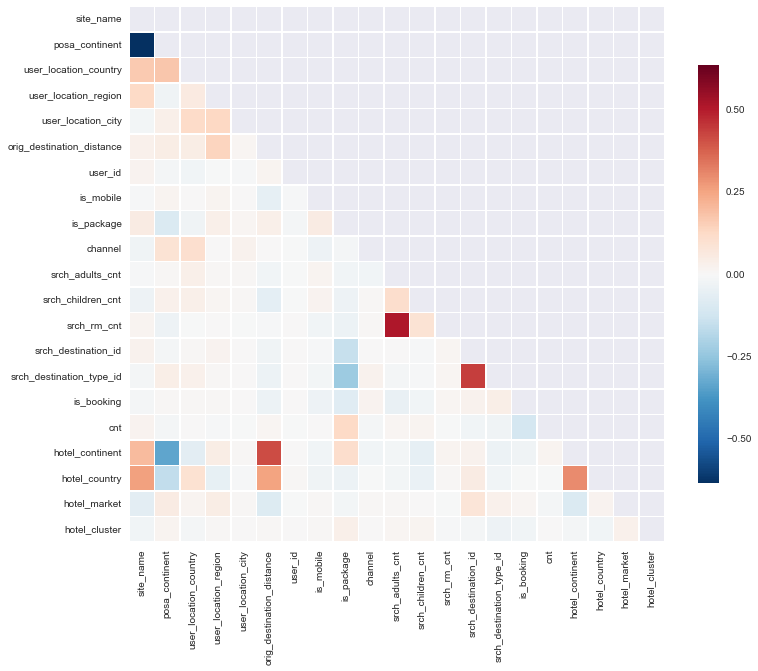

In [18]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

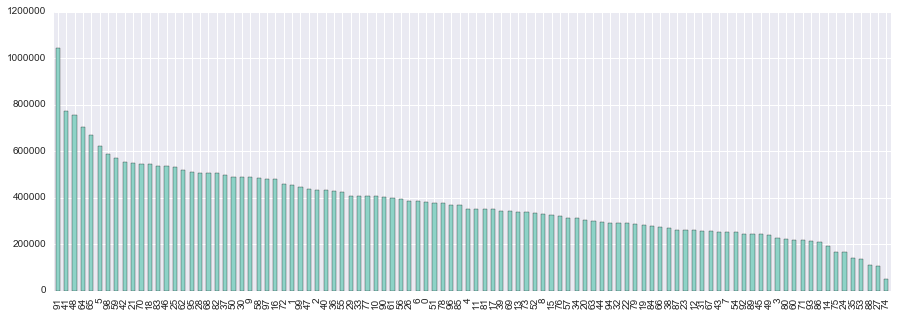

In [30]:
data["hotel_cluster"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

In [29]:
len(data.hotel_cluster.value_counts())

100